In [1]:
import warnings
warnings.filterwarnings('ignore')                

In [2]:
!pip install autogluon --quiet

In [3]:
from autogluon.tabular import TabularPredictor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("lung_cancer_examples.csv")
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [5]:
data.size

413

In [6]:
data.shape

(59, 7)

In [7]:
data.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [8]:
data.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [9]:
num_cols=data.select_dtypes(include="number")
num_cols

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


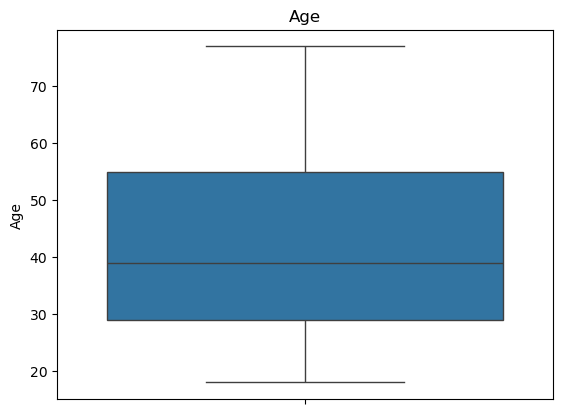

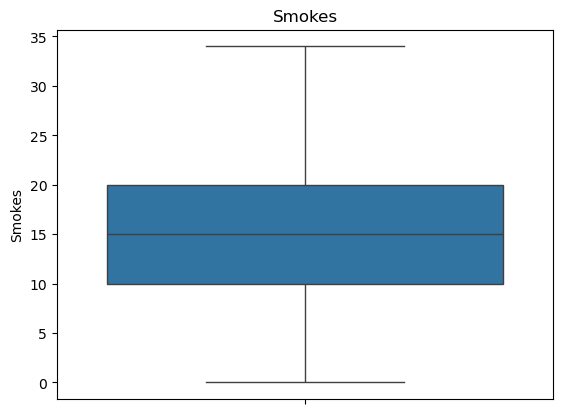

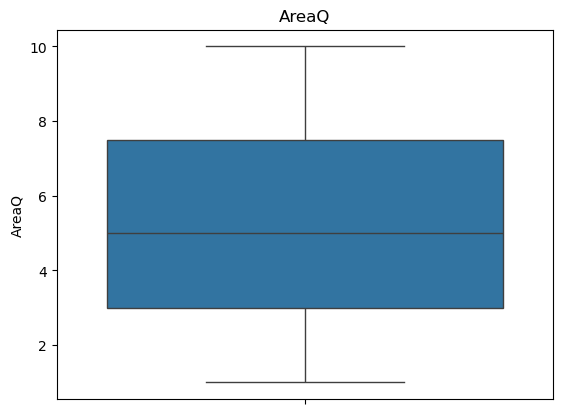

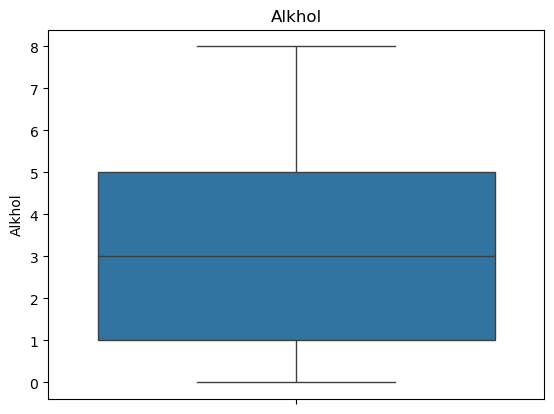

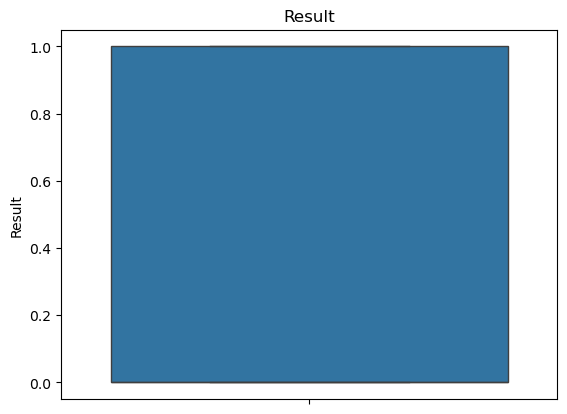

In [10]:
for  i in num_cols:
    plt.title(i)
    sns.boxplot(data[i])
    plt.show()

# EDA

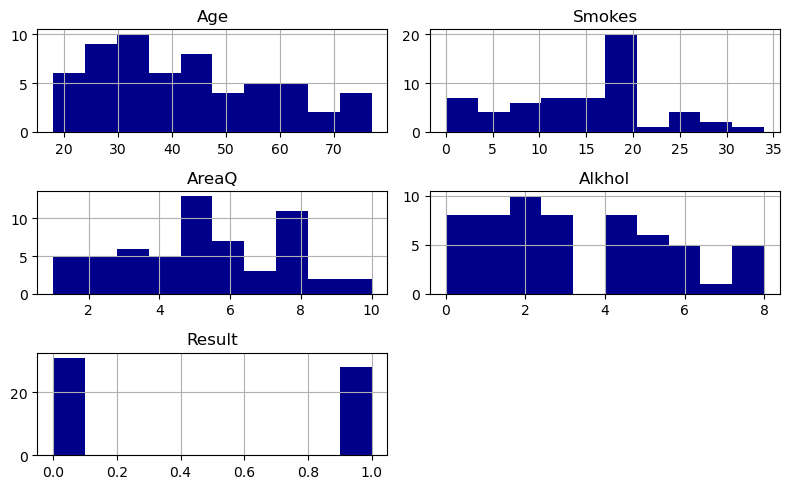

In [12]:
import matplotlib.pyplot as plt

num_cols = data.select_dtypes(include='number').columns  # Select numeric columns
data[num_cols].hist(figsize=(8, 5), color='darkblue')
plt.tight_layout()
plt.show()

In [13]:
train_data = data.sample(frac=0.8, random_state=42)

In [14]:
test_data = data.drop(train_data.index)

In [15]:
label = 'Result'

In [16]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20251014_111645"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       9.20 GB / 15.75 GB (58.4%)
Disk Space Avail:   11.88 GB / 147.89 GB (8.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU memory.
	presets='best'    : Maximize accurac

In [17]:
predictions = predictor.predict(test_data)
print(predictions)

7     0
10    0
14    1
18    1
20    1
22    0
28    1
38    0
42    1
48    0
51    1
58    0
Name: Result, dtype: int64


In [18]:
predictor.evaluate(test_data)

{'accuracy': 0.9166666666666666,
 'balanced_accuracy': 0.9285714285714286,
 'mcc': 0.8451542547285166,
 'roc_auc': 0.9571428571428571,
 'f1': 0.9230769230769231,
 'precision': 1.0,
 'recall': 0.8571428571428571}